<a href="https://colab.research.google.com/github/gudals6676/Python/blob/master/02_keras_%EB%A7%9B%EB%B3%B4%EA%B8%B0(%EC%9C%A0%EB%B0%A9%EC%95%94_%EC%83%9D%EC%A1%B4_%EC%98%88%EC%B8%A1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 목표
- 환자 데이터를 바탕으로 유방암인지 아닌지를 구분해보자!
- 신경망을 활용하여 2진 분류 문제를 해결해보자!


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
data = load_breast_cancer()
data

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For

In [4]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [19]:
X = data.data
y = data.target

In [20]:
X.shape, y.shape

((569, 30), (569,))

In [21]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state = 3)
# test_size의 디폴트값은 0.25(75: 25)

In [32]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(398, 30)
(171, 30)
(398,)
(171,)


### 신경망을 직접 설계해보자!
- 1. 신경망 구조 설계
- 2. 학습/평가 방법 설정
- 3. 학습 및 시각화
- 4. 평가

In [33]:
# 딥러닝을 위한 라이브러리를 임포트
from tensorflow.keras import Sequential     # 신경망의 뼈대를 구성
from tensorflow.keras.layers import Dense   # 신경망의 층을 구성

In [34]:
# 1. 신경망 구조 설계
md = Sequential()

# 입력층 + 중간층
# input_dim : 데이터 특성의 개수
# activation : 활성화 함수를 설정(들어온 자극(데이터)에 대한 응답여부를 결정하는 함수)
md.add(Dense(10, input_dim= 30, activation= "sigmoid"))

# 중간층
md.add(Dense(5, activation="sigmoid"))  # 하나의 층
md.add(Dense(3, activation="sigmoid"))  # 하나의 층

# 출력층
# 출력층은 회귀의 활성화함수(linear함수, 활성화 함수 생략가능)
# 2진 분류의 활성화함수(sigmoid)
md.add(Dense(1, activation="sigmoid"))

md.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_9 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_10 (Dense)             (None, 3)                 18        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 4         
Total params: 387
Trainable params: 387
Non-trainable params: 0
_________________________________________________________________


In [39]:
# 2.학습/평가 방법 설정
# binary_crossentropy : 2진 분류에 사용하는 손실함수(비용함수)
# -> 오차의 평균을 구하는 것은 MSE와 같지만 0~1사이 값으로 변환 후 평균오차를 구하는 방식
md.compile(loss="binary_crossentropy",
           optimizer = "Adam",          #최적화함수 : 확률적 경사하강법 사용  ,SGD
           metrics=["acc"]             #metrics : 평가 방법을 설정(분류 문제이기 때문에 정확도(acc)를 확인)
           )

In [40]:
h = md.fit(X_train, y_train, epochs=100)

Epoch 1/100
13/13 [==============================] - 1s 3ms/step - loss: 0.6507 - acc: 0.6231
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6497 - acc: 0.6231
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6488 - acc: 0.6231
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6481 - acc: 0.6231
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6472 - acc: 0.6231
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6465 - acc: 0.6231
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6457 - acc: 0.6231
Epoch 8/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6448 - acc: 0.6231
Epoch 9/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6438 - acc: 0.6231
Epoch 10/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6429 - acc: 0.6231
Epoch 11/100
13/13 [==============================] - 0s 2m

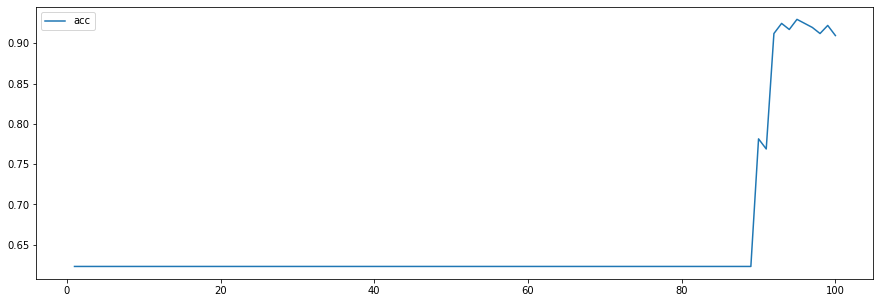

In [41]:
# 시각화
plt.figure(figsize=(15, 5))

plt.plot(range(1, 101, 1),
         h.history['acc'],
         label='acc'
         )

plt.legend()
plt.show()

In [42]:
# 모델 평가
md.evaluate(X_test, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.4214 - acc: 0.9240


[0.421408087015152, 0.9239766001701355]